# DNN Regression

Deep Neural Network Regression

DNN 은 Logistic Regression 모델을 깊게 쌓아서, 선형/비선형 데이터셋 및 분류/회귀 문제 모두에 사용할수 있습니다. 하지만, DNN은 최적화를 위한 학습시간이 오래 걸리기때문에 정말 고차원 모델이 필요하고 데이터의 양이 많은 경우를 제외하고는 다른 전통적인 알고리즘 시도 후, 시도 하는 것을 추천합니다.

Hidden Layer내의 노드 갯수와 Hidden Layer 의 층수 사이의 표현력 관계는 분류 문제의 결정 경계에 대한 예시이기는 하지만 아래 그림에서 볼수 있습니다. 

Hidden Layer내의 노드 갯수가 많아지면 저차원의 다양한 결정 경계를 그릴 수 있습니다.
![Hidden Unit Effect](https://cdn-images-1.medium.com/max/1600/1*RT-R9WeLjR_mn1irANbWfA.png)
![Hidden Unit Effect](https://cdn-images-1.medium.com/max/1600/1*vtWZRVA0vIm6XR-LLoz0aQ.png)

Hidden Layer의 층 수가 깊어지면 저차원으로는 표현할 수 없는 저차원을 조합한 고차원의 다양한 결정 경계를 그릴 수 있게 됩니다. 
![Hidden Layer Effect](https://cdn-images-1.medium.com/max/1600/1*mqTfsRjBrdjY2FsEuqqpaA.png)
![Hidden Layer Effect](https://cdn-images-1.medium.com/max/1600/1*eAw564GuxOlRMySM93dw7A.png)

이는 아래의 실험를 통해서도 볼 수 있습니다.

```
    DnnRegression(n_i = 1, n_hs = [16]),
    DnnRegression(n_i = 1, n_hs = [64]),
    DnnRegression(n_i = 1, n_hs = [256]),    
    DnnRegression(n_i = 1, n_hs = [16, 64, 16])        
```

비선형 데이터를 Regression 하는 문제에서 같은 학습 시간을 들였을때, Hidden Layer 의 노드 수만 증가 시키는 실험에서는 저차원 함수들로만 표현을 해야 해서 3차원 형태의 데이터를 회귀 성능에 대한 향상이 어려운 반면, Hidden Layer 층 수를 늘려주면 고차원 함수들로 표현력이 증가되어 더 좋은 회귀 성능을 보여주는 것을 확인 할 수 있습니다.

Using TensorFlow backend.


data shape: np_data_xs=(1000, 1), np_data_ys=(1000, 1)
train shape: np_train_xs=(700, 1), np_train_ys=(700, 1)
test shape: np_test_xs=(300, 1), np_test_ys=(300, 1)


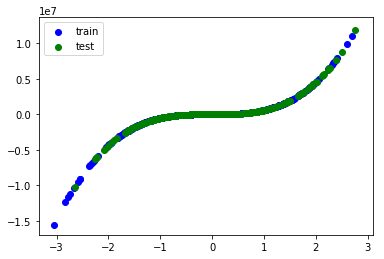


model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


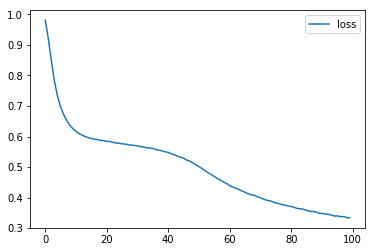

r_square=0.79909


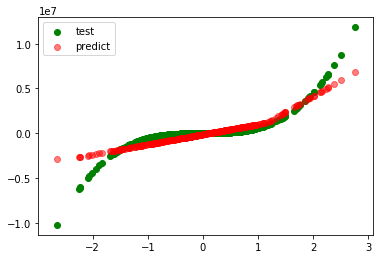


model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


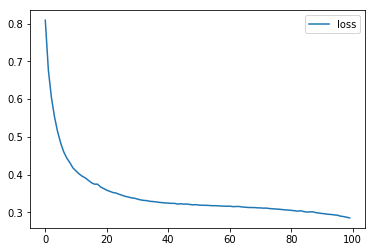

r_square=0.51512


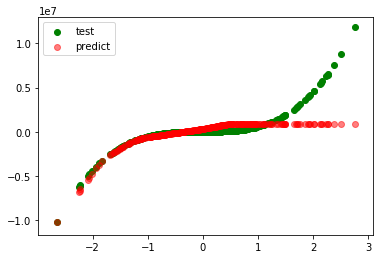


model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


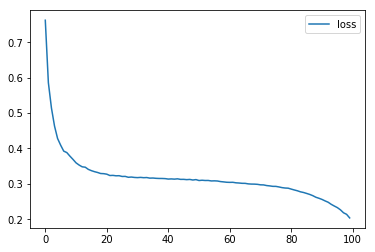

r_square=0.65194


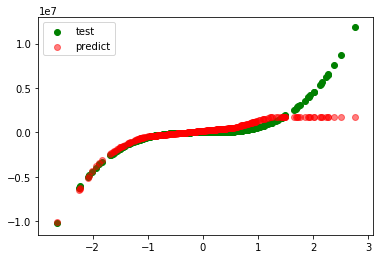


model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_12 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 2,179
Trainable params: 2,179
Non-trainable params: 0
_________________________________________________________________


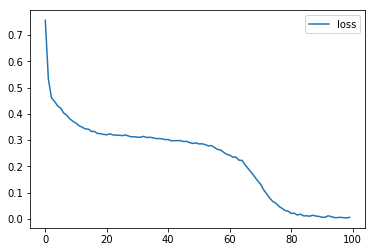

r_square=0.99344


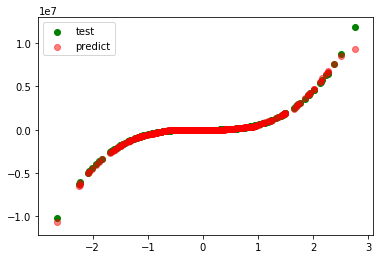

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import datasets, preprocessing, model_selection, metrics
from keras import models, layers, optimizers

# 데이터
np.random.seed(0)
n_samples = 1000
np_data_xs, np_data_ys = datasets.make_regression(
    n_samples=n_samples, # 데이터 수
    n_features=1, # X feature 수
    bias=1.0, # Y 절편
    noise=0.3, # X 변수들에 더해지는 잡음의 표준 편차
    random_state=0) # 난수 발생용 Seed 값
np_data_ys = np_data_ys**3 # Y 차원
np_data_ys = np_data_ys.reshape(-1, 1)
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))
np_train_xs, np_test_xs, np_train_ys, np_test_ys = model_selection.train_test_split(
    np_data_xs, np_data_ys, 
    test_size=0.3, shuffle=True, random_state=2)
print("train shape: np_train_xs={}, np_train_ys={}".format(np_train_xs.shape, np_train_ys.shape))
print("test shape: np_test_xs={}, np_test_ys={}".format(np_test_xs.shape, np_test_ys.shape))
plt.scatter(np_train_xs, np_train_ys, label='train', c='b')
plt.scatter(np_test_xs, np_test_ys, label='test', c='g')
plt.legend()
plt.show()

# 전처리
scaler_xs = preprocessing.StandardScaler()
np_train_scale_xs = scaler_xs.fit_transform(np_train_xs)
np_test_scale_xs = scaler_xs.transform(np_test_xs)

scaler_ys = preprocessing.StandardScaler()
np_train_scale_ys = scaler_ys.fit_transform(np_train_ys)
np_test_scale_ys = scaler_ys.transform(np_test_ys)

# 모델
class DnnRegressor(models.Sequential):
    def __init__(self, n_i, n_hs):
        super().__init__()
        self.add(layers.Dense(n_i, activation='relu', input_shape=(n_i,)))
        for l, n_h in enumerate(n_hs):
            self.add(layers.Dense(n_h, activation='relu'))
        self.add(layers.Dense(1, activation = 'linear'))
        sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
        self.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

models = [
    DnnRegressor(n_i = 1, n_hs = [16]),
    DnnRegressor(n_i = 1, n_hs = [64]),
    DnnRegressor(n_i = 1, n_hs = [256]),    
    DnnRegressor(n_i = 1, n_hs = [16, 64, 16])        
]

for model in models:
    # 학습
    print("\nmodel")
    model.summary()
    history = model.fit(np_train_scale_xs, np_train_scale_ys, epochs=100, batch_size=10, verbose=0)
    plt.plot(history.history['loss'], label='loss')
    plt.legend()
    plt.show()    

    # 평가
    np_pred_scale_ys = model.predict(np_test_scale_xs)
    np_pred_ys = scaler_ys.inverse_transform(np_pred_scale_ys)

    r_square = metrics.r2_score(np_test_ys, np_pred_ys)
    print("r_square={:.5f}".format(r_square))

    plt.scatter(np_test_xs, np_test_ys, label='test', c='g')
    plt.scatter(np_test_xs, np_pred_ys, label='predict', c='r', alpha=0.5)
    plt.legend()
    plt.show()